<h5>In this project, we will predict if according to certain information of a person, will he/she be accepted by the bank for a loan or not. As there will be categorical values, we will have to use models which can fit categorical values

First, lets import the basic libraries and read the data as 2 dataframes for each testing and training seperately and get a little details regarding the data

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns

plt.style.use('fivethirtyeight')
font = {'family' : 'monospace',
        'weight' : 'bold',
        'size'   : 22}
matplotlib.rc('font', **font)
%matplotlib inline

In [2]:
from IPython.display import display_html
def display_side_by_side(*args):
    html_str=''
    for df in args:
        html_str+=df.to_html()
    display_html(html_str.replace('table','table style="display:inline"'),raw=True)

In [3]:
df_test = pd.read_csv('test_data.csv')
df_train = pd.read_csv('train_data.csv')

In [4]:
df_train.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [5]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
Loan_ID              614 non-null object
Gender               601 non-null object
Married              611 non-null object
Dependents           599 non-null object
Education            614 non-null object
Self_Employed        582 non-null object
ApplicantIncome      614 non-null int64
CoapplicantIncome    614 non-null float64
LoanAmount           592 non-null float64
Loan_Amount_Term     600 non-null float64
Credit_History       564 non-null float64
Property_Area        614 non-null object
Loan_Status          614 non-null object
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [6]:
df_train.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [7]:
print(df_train.shape,' || ',df_test.shape)

(614, 13)  ||  (367, 12)


As you can see from the output of the *info* function, there is some missing data. Therefore, we have to deal with it before going further

In [8]:
total = df_train.isnull().sum().sort_values(ascending=False)
percent = (df_train.isnull().sum()/df_train.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total_Train', 'Percent_Train'])
#--#
total_test = df_test.isnull().sum().sort_values(ascending=False)
percent_test = (df_test.isnull().sum()/df_test.isnull().count()).sort_values(ascending=False)
missing_data_test = pd.concat([total_test, percent_test], axis=1, keys=['Total_Test', 'Percent_Test'])

display_side_by_side(missing_data.head(20),missing_data_test.head(20))

,Total_Train,Percent_Train
Credit_History,50,0.081433
Self_Employed,32,0.052117
LoanAmount,22,0.035831
Dependents,15,0.024430
Loan_Amount_Term,14,0.022801
Gender,13,0.021173
Married,3,0.004886
Loan_Status,0,0.000000
Property_Area,0,0.000000
CoapplicantIncome,0,0.000000


In [9]:
is_NaN = df_train.isnull()
row_has_NaN = is_NaN.any(axis=1)
rows_with_NaN = df_train[row_has_NaN]
rows_with_NaN

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
11,LP001027,Male,Yes,2,Graduate,NaN,2500,1840.0,109.0,360.0,1.0,Urban,Y
16,LP001034,Male,No,1,Not Graduate,No,3596,0.0,100.0,240.0,NaN,Urban,Y
19,LP001041,Male,Yes,0,Graduate,NaN,2600,3500.0,115.0,NaN,1.0,Urban,Y
23,LP001050,NaN,Yes,2,Not Graduate,No,3365,1917.0,112.0,360.0,0.0,Rural,N
...,...,...,...,...,...,...,...,...,...,...,...,...,...
592,LP002933,NaN,No,3+,Graduate,Yes,9357,0.0,292.0,360.0,1.0,Semiurban,Y
597,LP002943,Male,No,NaN,Graduate,No,2987,0.0,88.0,360.0,0.0,Semiurban,N
600,LP002949,Female,No,3+,Graduate,NaN,416,41667.0,350.0,180.0,NaN,Urban,N
601,LP002950,Male,Yes,0,Not Graduate,NaN,2894,2792.0,155.0,360.0,1.0,Rural,Y


In [10]:
is_NaN_test = df_test.isnull()
row_has_NaN_test = is_NaN_test.any(axis=1)
rows_with_NaN_test = df_test[row_has_NaN_test]
rows_with_NaN_test

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
8,LP001059,Male,Yes,2,Graduate,NaN,13633,0,280.0,240.0,1.0,Urban
11,LP001082,Male,Yes,1,Graduate,NaN,2185,1516,162.0,360.0,1.0,Semiurban
12,LP001083,Male,No,3+,Graduate,No,4166,0,40.0,180.0,NaN,Urban
13,LP001094,Male,Yes,2,Graduate,NaN,12173,0,166.0,360.0,0.0,Semiurban
...,...,...,...,...,...,...,...,...,...,...,...,...
336,LP002853,Female,No,0,Not Graduate,No,3015,2000,145.0,360.0,NaN,Urban
351,LP002901,Male,No,0,Graduate,No,2283,15000,106.0,360.0,NaN,Rural
358,LP002954,Male,Yes,2,Not Graduate,No,3132,0,76.0,360.0,NaN,Rural
360,LP002965,Female,Yes,0,Graduate,No,8550,4255,96.0,360.0,NaN,Urban


The above tables shows the number of rows with missing data and which columns have the missing data and the total percentage relative to the whole dataset

In [11]:
df_train['Gender'] = df_train['Gender'].fillna(df_train['Gender'].dropna().mode().values[0])
df_train['Married'] = df_train['Married'].fillna(df_train['Married'].dropna().mode().values[0])
df_train['Dependents'] = df_train['Dependents'].fillna(df_train['Dependents'].dropna().mode().values[0])
df_train['Self_Employed'] = df_train['Self_Employed'].fillna(df_train['Self_Employed'].dropna().mode().values[0])
df_train['LoanAmount'] = df_train['LoanAmount'].fillna(df_train['LoanAmount'].dropna().median())
df_train['Loan_Amount_Term'] = df_train['Loan_Amount_Term'].fillna(df_train['Loan_Amount_Term'].dropna().mode().values[0])
df_train['Credit_History'] = df_train['Credit_History'].fillna(df_train['Credit_History'].dropna().mode().values[0])

In [12]:
df_test['Gender'] = df_test['Gender'].fillna(df_test['Gender'].dropna().mode().values[0])
df_test['Married'] = df_test['Married'].fillna(df_test['Married'].dropna().mode().values[0])
df_test['Dependents'] = df_test['Dependents'].fillna(df_test['Dependents'].dropna().mode().values[0])
df_test['Self_Employed'] = df_test['Self_Employed'].fillna(df_test['Self_Employed'].dropna().mode().values[0])
df_test['LoanAmount'] = df_test['LoanAmount'].fillna(df_test['LoanAmount'].dropna().median())
df_test['Loan_Amount_Term'] = df_test['Loan_Amount_Term'].fillna(df_test['Loan_Amount_Term'].dropna().mode().values[0])
df_test['Credit_History'] = df_test['Credit_History'].fillna(df_test['Credit_History'].dropna().mode().values[0])

For some cells, mode or median is taken of the column in the dataset and the *NaN* values are replaced with it

In [13]:
total = df_train.isnull().sum().sort_values(ascending=False)
percent = (df_train.isnull().sum()/df_train.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total_Train', 'Percent_Train'])
#--#
total_test = df_test.isnull().sum().sort_values(ascending=False)
percent_test = (df_test.isnull().sum()/df_test.isnull().count()).sort_values(ascending=False)
missing_data_test = pd.concat([total_test, percent_test], axis=1, keys=['Total_Test', 'Percent_Test'])

display_side_by_side(missing_data.head(20),missing_data_test.head(20),)

,Total_Train,Percent_Train
Loan_Status,0,0.0
Property_Area,0,0.0
Credit_History,0,0.0
Loan_Amount_Term,0,0.0
LoanAmount,0,0.0
CoapplicantIncome,0,0.0
ApplicantIncome,0,0.0
Self_Employed,0,0.0
Education,0,0.0
Dependents,0,0.0


As you can see, all the missing values have been replaced properly

<h5>Now lets visualize our data for it to become more understandible

<AxesSubplot:xlabel='count', ylabel='Self_Employed'>

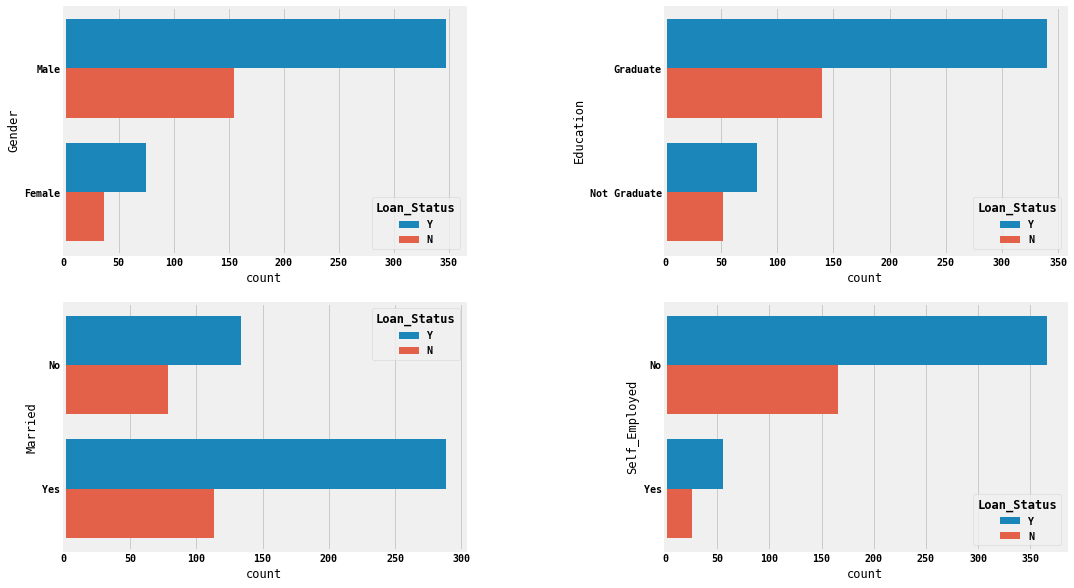

In [14]:
fig1, axs1 = plt.subplots(2,2,figsize=(16,10))
fig1.subplots_adjust(wspace=.5)
sns.countplot(y='Gender', hue='Loan_Status', data=df_train, ax=axs1[0][0])
sns.countplot(y='Married', hue='Loan_Status', data=df_train, ax=axs1[1][0])
sns.countplot(y='Education', hue='Loan_Status', data=df_train, ax=axs1[0][1])
sns.countplot(y='Self_Employed', hue='Loan_Status', data=df_train, ax=axs1[1][1])

Now lets compare some variables with seperate genders

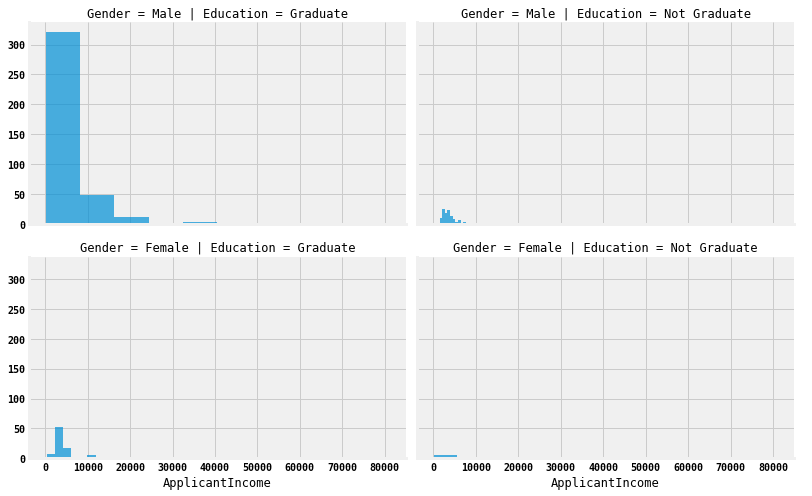

In [15]:
grd = sns.FacetGrid(df_train,row='Gender',col='Education',height=3.5,aspect=1.6)
grd.map(plt.hist,'ApplicantIncome',alpha=0.7,bins=10)
grd.add_legend()

Lets binarize the categorical columns to train our model

In [16]:
code_numeric = {'Male': 1, 'Female': 2,
'Yes': 1, 'No': 2,
'Graduate': 1, 'Not Graduate': 2,
'Urban': 3, 'Semiurban': 2,'Rural': 1,
'Y': 1, 'N': 0,
'3+': 3}

In [17]:
df_train = df_train.applymap(lambda s: code_numeric.get(s) if s in code_numeric else s)
df_test = df_test.applymap(lambda s: code_numeric.get(s) if s in code_numeric else s)
df_train.drop('Loan_ID', axis = 1, inplace = True)
df_test.drop('Loan_ID', axis = 1, inplace = True)

In [18]:
Dependents_ = pd.to_numeric(df_train.Dependents)
Dependents__ = pd.to_numeric(df_test.Dependents)
df_train.drop(['Dependents'], axis = 1, inplace = True)
df_test.drop(['Dependents'], axis = 1, inplace = True)
df_train = pd.concat([df_train, Dependents_], axis = 1)
df_test = pd.concat([df_test, Dependents__], axis = 1)

Now lets visualize the correlation between the variables

<AxesSubplot:>

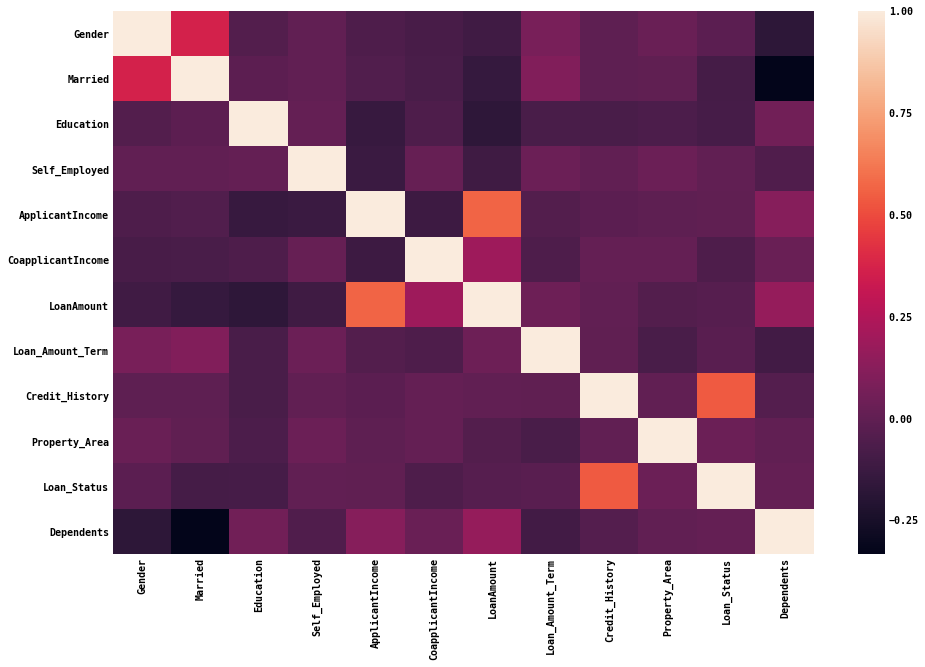

In [19]:
plt.figure(figsize=(14,10))
sns.heatmap(df_train.corr())

Now lets alter our dataframe to train our model

In [25]:
y_train = df_train['Loan_Status']
X_train = df_train.drop('Loan_Status', axis = 1)

Lets import our models. As we are working with categorical data, lets import multiple models

In [23]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier   #Decision Tree
from sklearn.linear_model import LogisticRegression  #Logistic Regression
from sklearn.ensemble import RandomForestClassifier  #Random Forest

In [26]:
X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, test_size=0.20, random_state=0)

In [28]:
#Logistic Regression
#prediction results -> 1=Yes, 0=No 
model = LogisticRegression(max_iter=200)
model.fit(X_train, y_train)
ypred = model.predict(X_test)
evaluation = f1_score(y_test, ypred)
evaluation

0.8979591836734695

In [29]:
#Decision tree
tree = DecisionTreeClassifier()
tree.fit(X_train, y_train)
ypred_tree = tree.predict(X_test)
evaluation_tree = f1_score(y_test, ypred_tree)
evaluation_tree

0.75

In [30]:
#Random Forest
forest = RandomForestClassifier()
forest.fit(X_train, y_train)
ypred_forest = forest.predict(X_test)
evaluation_forest = f1_score(y_test, ypred_forest)
evaluation_forest

0.8526315789473685

In [ ]:
df_test['Loan_status'] = model.predict(df_test)

In [48]:
df_test['Loan_Status_Pred'] = pd.Series(np.where(df_test.Loan_status.values == 1, 'Yes', 'No'),
          df_test.index)

In [52]:
df_test.head()

,Gender,Married,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Dependents,Loan_Status_Pred
0,1,1,1,2,5720,0,110.0,360.0,1.0,3,0,Yes
1,1,1,1,2,3076,1500,126.0,360.0,1.0,3,1,Yes
2,1,1,1,2,5000,1800,208.0,360.0,1.0,3,2,Yes
3,1,1,1,2,2340,2546,100.0,360.0,1.0,3,2,Yes
4,1,2,2,2,3276,0,78.0,360.0,1.0,3,0,Yes
